# DSC-609: Machine Learning
### Michael Albers
### 08/13/2022

In [87]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
%cd /content/drive/My\ Drive/DSC-609-Machine\ Learning/data

/content/drive/My Drive/DSC-609-Machine Learning/data


In [89]:
%ls

uci_credit_card.csv


## Overview

- Classify credit card defaults using Deep Neural Network
- Report accuracy scores and performance

In [90]:
from google.colab import data_table

In [91]:
data_table.enable_dataframe_formatter()

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [94]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [95]:
tf.__version__

'2.8.2'

In [96]:
from tensorflow.keras.optimizers import Adam

## Data Set

### UCI Credit Card Default

*Download Link:* 

https://assets.datacamp.com/production/repositories/3953/datasets/692b2c9bd91688f9f96882f10f0edf691ae32ec9/uci_credit_card.csv

*Data Set Information:*

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Load and Preprocessing 

In [97]:
credit_card_df = pd.read_csv('uci_credit_card.csv')

In [98]:
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [99]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [100]:
credit_card_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [101]:
credit_card_df["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [102]:
credit_card_df.rename(columns = {'default.payment.next.month':'DEFAULT_PMT_FLAG'}, inplace = True)

## Create New features

- Consolodate PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 columns into single column called MAX_PAY_DELAY_MOS. MAX_PAY_DELAY_MONTHS represents the maximum number of months borrower was late in making a payment.

- Calculate mean and median of Bill Amount columns for each sample

- Calculate mean and median of Pay Amount columns for each sample

In [103]:
def get_maximum_payment_delay(*pay_cols):
  """
  Return the maximum payment months from the list of payment columns passed in

  param: pay_cols: list of payment month delays i.e. [2,3] represents two and three months late payments
  """
  return np.max(pay_cols)

In [104]:
def calc_mean_bill_amount(*bill_amt_cols):
  """
  Calcuate mean of billing amount columns passed in

  param: bill_amt_cols: list of billing amount columns
  """
  return np.mean(bill_amt_cols).round()

In [105]:
def calc_mean_pay_amount(*pay_amt_cols):
  """
  Calculate mean of payment amount columns passed in

  param: pay_amt_cols: list of pay amount columns
  """
  return np.mean(pay_amt_cols).round()

### Create MAX_PAY_DELAY_MONTHS column
> MAX_PAY_DELAY_MONTHS is the maximum number of months payment was late.

In [106]:
credit_card_df["MAX_PAY_DELAY_MONTHS"] = credit_card_df.apply(lambda x: get_maximum_payment_delay(x.PAY_0, x.PAY_2, x.PAY_3, x.PAY_4, x.PAY_5, x.PAY_6), axis=1)

In [107]:
credit_card_df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "MAX_PAY_DELAY_MONTHS"]].sample(25)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,MAX_PAY_DELAY_MONTHS
25465,0,0,0,0,0,2,2.0
1789,0,0,0,0,0,0,0.0
21267,0,0,0,0,0,0,0.0
9357,-2,-1,2,-1,0,0,2.0
26688,0,0,0,0,0,0,0.0
18712,0,0,0,0,0,0,0.0
17316,2,2,0,0,2,0,2.0
22322,-1,-1,-1,-1,-1,-1,-1.0
7320,-1,-1,-1,-1,-1,-1,-1.0
21895,0,-1,2,0,0,0,2.0


### Create Mean Billing Amount columns

In [108]:
credit_card_df["MEAN_BILL_AMT"] = credit_card_df.apply(lambda x: calc_mean_bill_amount(x.BILL_AMT1,x.BILL_AMT2,x.BILL_AMT3,x.BILL_AMT4,x.BILL_AMT5,x.BILL_AMT6), axis=1)

### Create Mean Payment Amount columns

In [109]:
credit_card_df["MEAN_PAY_AMT"] = credit_card_df.apply(lambda x: calc_mean_pay_amount(x.PAY_AMT1,x.PAY_AMT2,x.PAY_AMT3,x.PAY_AMT4,x.PAY_AMT5,x.PAY_AMT6), axis=1)

# Exploratory Data Analysis (EDA)

In [110]:
credit_card_df2 = credit_card_df[["LIMIT_BAL",	"SEX",	"EDUCATION",	"MARRIAGE",	"AGE", "MAX_PAY_DELAY_MONTHS", "MEAN_BILL_AMT", "MEAN_PAY_AMT", "DEFAULT_PMT_FLAG"]]

In [111]:
credit_card_df2.head(25)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,MAX_PAY_DELAY_MONTHS,MEAN_BILL_AMT,MEAN_PAY_AMT,DEFAULT_PMT_FLAG
0,20000.0,2,2,1,24,2.0,1284.0,115.0,1
1,120000.0,2,2,2,26,2.0,2846.0,833.0,1
2,90000.0,2,2,2,34,0.0,16942.0,1836.0,0
3,50000.0,2,2,1,37,0.0,38556.0,1398.0,0
4,50000.0,1,2,1,57,0.0,18223.0,9842.0,0
5,50000.0,1,1,2,37,0.0,39686.0,1295.0,0
6,500000.0,1,1,2,29,0.0,454099.0,30126.0,0
7,100000.0,2,2,2,23,0.0,2248.0,798.0,0
8,140000.0,2,3,1,28,2.0,10869.0,1127.0,0
9,20000.0,1,3,2,35,-1.0,4486.0,2355.0,0


In [112]:
credit_card_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LIMIT_BAL             30000 non-null  float64
 1   SEX                   30000 non-null  int64  
 2   EDUCATION             30000 non-null  int64  
 3   MARRIAGE              30000 non-null  int64  
 4   AGE                   30000 non-null  int64  
 5   MAX_PAY_DELAY_MONTHS  30000 non-null  float64
 6   MEAN_BILL_AMT         30000 non-null  float64
 7   MEAN_PAY_AMT          30000 non-null  float64
 8   DEFAULT_PMT_FLAG      30000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 2.1 MB


In [113]:
credit_card_df2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,MAX_PAY_DELAY_MONTHS,MEAN_BILL_AMT,MEAN_PAY_AMT,DEFAULT_PMT_FLAG
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.438733,44976.943700,5275.231633,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.345154,63260.722001,10137.946665,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-56043.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,4781.750000,1113.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,21052.000000,2397.500000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,2.000000,57104.250000,5584.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,877314.000000,627344.000000,1.000000


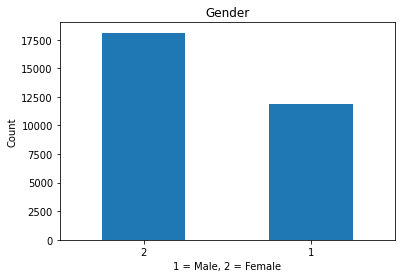

In [114]:
credit_card_df2["SEX"].value_counts().plot(kind="bar", rot=0)
plt.title("Gender")
plt.ylabel("Count")
plt.xlabel("1 = Male, 2 = Female")
plt.show()

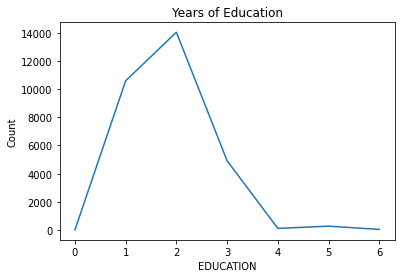

In [115]:
credit_card_df2.groupby("EDUCATION")["EDUCATION"].count().plot()
plt.title("Years of Education")
plt.ylabel("Count")
plt.show()

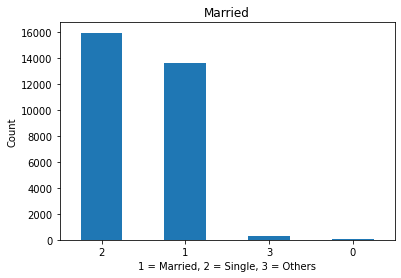

In [116]:
credit_card_df2["MARRIAGE"].value_counts().plot(kind="bar", rot=0)
plt.title("Married")
plt.ylabel("Count")
plt.xlabel("1 = Married, 2 = Single, 3 = Others")
plt.show()

In [117]:
# Create copy of dataframe for binning columns
credit_card_bin = credit_card_df2.copy()

In [118]:
credit_card_bin["age"] = pd.cut(credit_card_bin["AGE"], bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65], 
                                labels=["18 to 25", "25 to 30", "30 to 35", "35 to 40", "40 to 45", "45 to 50", "55 to 60", "60 to 65", "Over 65"], 
                                include_lowest=True)

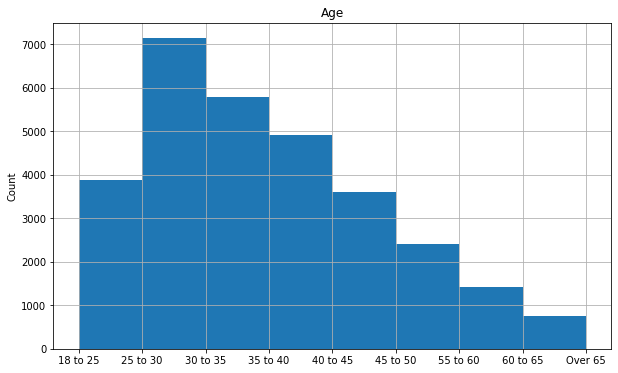

In [119]:
credit_card_bin.age.sort_values().hist(figsize=(10,6), bins=8)
plt.title("Age")
plt.ylabel("Count")
plt.show()

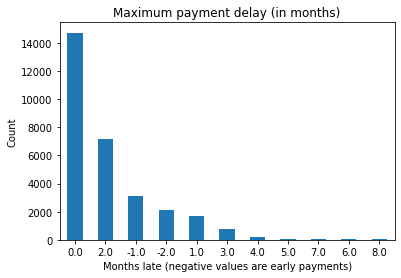

In [120]:
credit_card_df2["MAX_PAY_DELAY_MONTHS"].sort_values().value_counts().plot(kind="bar", rot=0)
plt.title("Maximum payment delay (in months)")
plt.ylabel("Count")
plt.xlabel("Months late (negative values are early payments)")
plt.show()

In [121]:
credit_card_bin["limit_bal"] = pd.cut(credit_card_bin["LIMIT_BAL"], bins=[10000, 25000, 50000, 140000, 240000, 1000000], 
                                      labels=["10k to 25k", "25k to 50k", "50k to 140k", "140k to 240k", "240k to 1 Mil"], include_lowest=True)

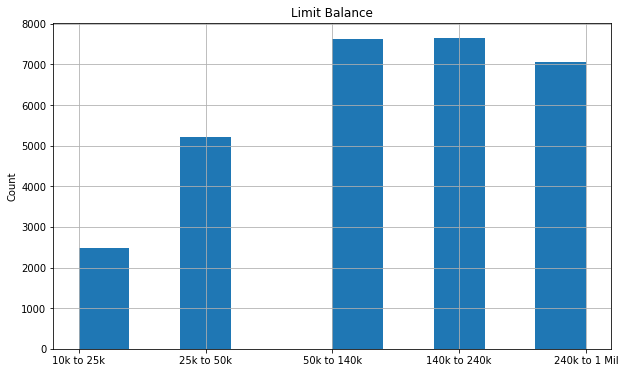

In [122]:
credit_card_bin.limit_bal.sort_values().hist(figsize=(10,6), bins=10)
plt.title("Limit Balance")
plt.ylabel("Count")
plt.show()

In [123]:
credit_card_bin["mean_bill_amt"] = pd.cut(credit_card_bin["MEAN_BILL_AMT"], bins=[0, 5000, 20000, 60000, 100000, 500000, 800000], 
                                          labels=["0 to 5k", "5k to 20k", "20k to 60k", "60k to 100k", "100k to 500k", "500k to 800k"], include_lowest=True)

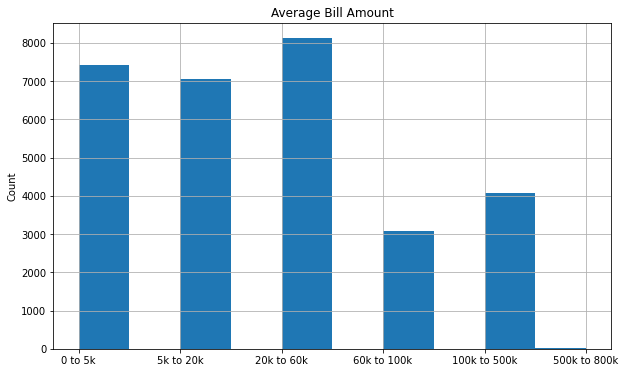

In [124]:
credit_card_bin.mean_bill_amt.sort_values().hist(figsize=(10,6), bins=10)
plt.title("Average Bill Amount")
plt.ylabel("Count")
plt.show()

In [125]:
credit_card_bin["mean_pay_amt"] = pd.cut(credit_card_bin["MEAN_PAY_AMT"], bins=[0, 2000, 3000, 6000, 25000, 50000, 100000, 200000, 700000], 
                                         labels=["0 to 2k", "2k to 3k", "3k to 6k", "6k to 25k", "25k to 50k", "50k to 100k", "100k to 200k", "200k to 700k"], include_lowest=True)

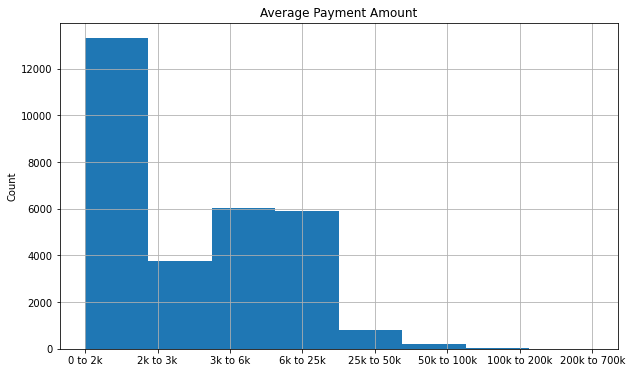

In [126]:
credit_card_bin.mean_pay_amt.sort_values().hist(figsize=(10,6), bins=8)
plt.title("Average Payment Amount")
plt.ylabel("Count")
plt.show()

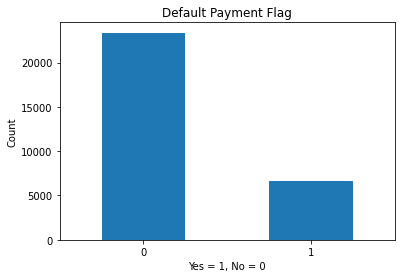

In [127]:
credit_card_df2.groupby("DEFAULT_PMT_FLAG")["DEFAULT_PMT_FLAG"].count().plot(kind="bar", rot=0)
plt.title("Default Payment Flag")
plt.ylabel("Count")
plt.xlabel("Yes = 1, No = 0")
plt.show()

# Deep Learning Model

## Prepare Data

- Discretize Limit balance, Billing and Payment columns
- Scale Sex, Education, Marriage and Age features

### Discretize LIMIT_BAL

In [128]:
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [129]:
x = credit_card_df2.LIMIT_BAL.values.reshape(-1, 1)

In [130]:
x.shape

(30000, 1)

In [131]:
credit_card_df2.loc[:,"LIMIT_BAL_CATEG"] = kb.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [132]:
credit_card_df2["LIMIT_BAL_CATEG"].value_counts()

0.0    12498
1.0     7880
2.0     5059
3.0     2759
4.0     1598
5.0      127
6.0       56
7.0       22
9.0        1
Name: LIMIT_BAL_CATEG, dtype: int64

### Discretize MEAN_BILL_AMT

In [133]:
kb2 = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')

In [134]:
x2 = credit_card_df2.MEAN_BILL_AMT.values.reshape(-1, 1)

In [135]:
x2.shape

(30000, 1)

In [136]:
credit_card_df2.loc[:, "BILL_AMT_CATEG"] = kb2.fit_transform(x2)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [137]:
credit_card_df2["BILL_AMT_CATEG"].value_counts()

17.0    1502
3.0     1501
10.0    1501
19.0    1501
11.0    1500
6.0     1500
0.0     1500
12.0    1500
2.0     1500
5.0     1500
4.0     1500
7.0     1500
13.0    1500
8.0     1500
15.0    1500
14.0    1499
18.0    1499
1.0     1499
9.0     1499
16.0    1499
Name: BILL_AMT_CATEG, dtype: int64

### Discretize MEAN_PAY_AMT

In [138]:
x3 = credit_card_df2.MEAN_PAY_AMT.values.reshape(-1, 1)

In [139]:
x3.shape

(30000, 1)

In [140]:
credit_card_df2.loc[:, "PAY_AMT_CATEG"] = kb2.fit_transform(x3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [141]:
credit_card_df2["PAY_AMT_CATEG"].value_counts()

11.0    1548
7.0     1514
5.0     1504
18.0    1504
14.0    1502
3.0     1501
8.0     1501
15.0    1501
16.0    1500
0.0     1500
1.0     1500
9.0     1500
19.0    1500
13.0    1500
12.0    1499
2.0     1499
17.0    1496
4.0     1495
6.0     1486
10.0    1450
Name: PAY_AMT_CATEG, dtype: int64

In [142]:
credit_card_model_df = credit_card_df2[["SEX", "EDUCATION", "MARRIAGE", "AGE", "MAX_PAY_DELAY_MONTHS", "LIMIT_BAL_CATEG", "BILL_AMT_CATEG", "PAY_AMT_CATEG", "DEFAULT_PMT_FLAG"]]

In [143]:
credit_card_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEX                   30000 non-null  int64  
 1   EDUCATION             30000 non-null  int64  
 2   MARRIAGE              30000 non-null  int64  
 3   AGE                   30000 non-null  int64  
 4   MAX_PAY_DELAY_MONTHS  30000 non-null  float64
 5   LIMIT_BAL_CATEG       30000 non-null  float64
 6   BILL_AMT_CATEG        30000 non-null  float64
 7   PAY_AMT_CATEG         30000 non-null  float64
 8   DEFAULT_PMT_FLAG      30000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 2.1 MB


In [144]:
credit_card_model_df.head(25)

,SEX,EDUCATION,MARRIAGE,AGE,MAX_PAY_DELAY_MONTHS,LIMIT_BAL_CATEG,BILL_AMT_CATEG,PAY_AMT_CATEG,DEFAULT_PMT_FLAG
0,2,2,1,24,2.0,0.0,2.0,1.0,1
1,2,2,2,26,2.0,1.0,3.0,3.0,1
2,2,2,2,34,0.0,0.0,8.0,8.0,0
3,2,2,1,37,0.0,0.0,13.0,6.0,0
4,1,2,1,57,0.0,0.0,9.0,17.0,0
5,1,1,2,37,0.0,0.0,13.0,5.0,0
6,1,1,2,29,0.0,4.0,19.0,19.0,0
7,2,2,2,23,0.0,0.0,3.0,3.0,0
8,2,3,1,28,2.0,1.0,7.0,5.0,0
9,1,3,2,35,-1.0,0.0,4.0,9.0,0


### Split dataset into Training and Test set

In [145]:
# Divide data set into predictor and target values
X = credit_card_model_df.iloc[:, :-1].values
y = credit_card_model_df.iloc[:, -1].values

In [146]:
X.shape

(30000, 8)

In [147]:
y.shape

(30000,)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [149]:
X_train.shape

(24000, 8)

In [150]:
X_test.shape

(6000, 8)

In [151]:
y_train.shape

(24000,)

In [152]:
y_test.shape

(6000,)

## Feature Scaling

In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [154]:
print(X_train)

[[ 2.          2.          2.         ... -0.90142123 -0.08275365
   0.96089785]
 [ 2.          2.          1.         ... -0.90142123 -1.47065555
  -1.474287  ]
 [ 1.          1.          1.         ... -0.09822429 -1.64414329
  -1.64822877]
 ...
 [ 1.          2.          2.         ... -0.90142123  0.26422182
  -0.95246167]
 [ 1.          1.          2.         ... -0.90142123 -0.7767046
   0.96089785]
 [ 1.          2.          1.         ...  0.70497265 -0.08275365
   1.3087814 ]]


In [155]:
print(X_test)

[[ 1.          3.          1.         ...  1.50816959  1.30514825
   0.6130143 ]
 [ 2.          3.          1.         ... -0.90142123 -1.47065555
  -1.30034522]
 [ 1.          2.          1.         ... -0.90142123  0.09073409
   1.48272317]
 ...
 [ 1.          2.          2.         ... -0.90142123 -0.95019234
  -0.0827528 ]
 [ 2.          2.          1.         ... -0.90142123 -0.95019234
  -1.30034522]
 [ 2.          2.          1.         ...  0.70497265 -0.7767046
   0.78695607]]


## Train Model

In [156]:
number_input_features = len(X_train[0])
hidden_nodes_layer_1 = 8
hidden_nodes_layer_2 = 4

In [157]:
number_input_features

8

In [158]:
nn = tf.keras.models.Sequential()

In [159]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=number_input_features, activation="relu"))

In [160]:
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="relu"))

In [161]:
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [162]:
# Model summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [163]:
# compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [164]:
# train the model
model_fit = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5172 - accuracy: 0.7686
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4681 - accuracy: 0.7869
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4627 - accuracy: 0.7900
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4577 - accuracy: 0.7913
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4546 - accuracy: 0.7920
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4533 - accuracy: 0.7916
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4527 - accuracy: 0.7918
Epoch 8/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4522 - accuracy: 0.7930
Epoch 9/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4517 - accuracy: 0.7917
Epoch 10/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4514 - accura

# Classification Model Results

In [165]:
# Evaluate model
loss, accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {loss}, Accuracy: {accuracy}")

188/188 - 0s - loss: 0.4502 - accuracy: 0.7910 - 406ms/epoch - 2ms/step
Loss: 0.45018094778060913, Accuracy: 0.7910000085830688


## Make Predictions

> Take random sample from the model dataframe and make preductions, and then evaluate results

In [166]:
model_sample = credit_card_model_df.sample(frac=0.3, random_state=1)

In [167]:
model_sample.shape

(9000, 9)

In [168]:
X_sample = model_sample.iloc[:, :-1].values
y_sample = model_sample.iloc[:, -1].values

In [169]:
X_sample.shape

(9000, 8)

In [170]:
y_sample.shape

(9000,)

In [171]:
# Scale data
X_sample[:, 3:] = sc.fit_transform(X_sample[:, 3:])

In [172]:
# Make predictions
predictions = nn.predict(X_sample)

In [173]:
predictions[:5]

array([[0.06533282],
       [0.4627217 ],
       [0.12154181],
       [0.65165734],
       [0.39880115]], dtype=float32)

In [178]:
from sklearn.metrics import confusion_matrix, classification_report

In [186]:
predict_label = np.where(predictions > 0.5, 1, 0)

In [187]:
predict_label[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [189]:
y_sample[:5]

array([0, 1, 0, 1, 0])

In [190]:
confusion_matrix(y_sample, predict_label)

array([[6492,  508],
       [1364,  636]])

In [193]:
print(classification_report(y_sample, predict_label, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.83      0.93      0.87      7000
     Default       0.56      0.32      0.40      2000

    accuracy                           0.79      9000
   macro avg       0.69      0.62      0.64      9000
weighted avg       0.77      0.79      0.77      9000



# Summary

- The accuracy of the model evaluation was 79%

- The predictions of the random sample taken was 79% accurate which indicates that there is no overfitting

- Although the model scored a decent accuracy score of 79%, it does a poor job of predicting credit card defaults since the recall for Default is 32%. This is most likely due to the dataset having far more *non-default* samples than *defaults*

# References

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.